# Analysis of Global Temperature, CO2 and Methane changes over the past 800,000 years

Required libraries.

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as ss
import sklearn.neighbors as nei
from sklearn.linear_model import LinearRegression

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 5]

In [60]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### CO2 from 800kyrs to Present

Reading in CO2 data from 

In [61]:
co2df=pd.read_csv('correctedantarctica2015co2.csv', skiprows=14, usecols=[0,1,2,])

In [62]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04
...,...,...,...
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69


In [63]:
co2df['year_co2'] = co2df['Gasage (yr BP)'].apply(lambda x: -x)

In [64]:
co2df['year_co2'] = co2df['year_co2'].astype(int)

In [65]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),year_co2
0,-51.03,368.02,0.06,51
1,-48.00,361.78,0.37,48
2,-46.28,359.65,0.10,46
3,-44.41,357.11,0.16,44
4,-43.08,353.95,0.04,43
...,...,...,...,...
1896,803925.28,202.92,2.06,-803925
1897,804009.87,207.50,0.92,-804009
1898,804522.67,204.86,1.64,-804522
1899,805132.44,202.23,0.69,-805132


[Text(0.5, 1.0, 'Corrected Composite CO2 800kyrs to Present')]

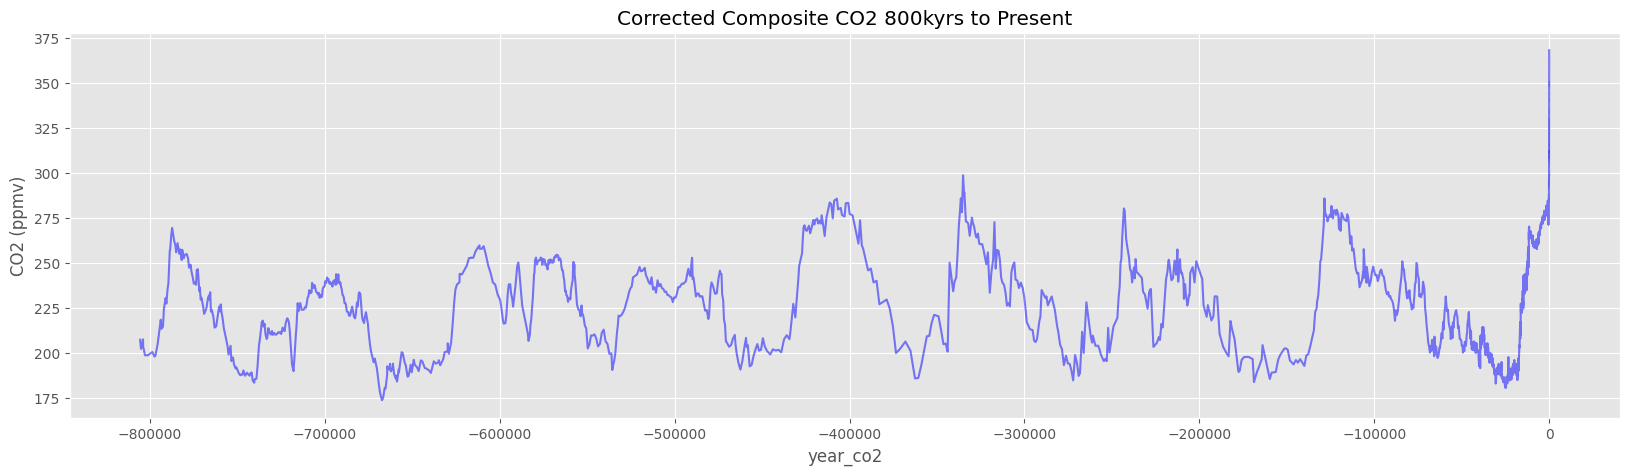

In [216]:
sns.lineplot(data=co2df, x='year_co2', y='CO2 (ppmv)', color='blue', alpha = 0.5).set(title='Corrected Composite CO2 800kyrs to Present')

In [129]:
co2 = co2df['CO2 (ppmv)'].to_numpy()
co2

array([368.02, 361.78, 359.65, ..., 204.86, 202.23, 207.29])

In [137]:
co2_mean = co2.mean()
co2_mean

235.56669121514994

In [138]:
co2_std = co2.std()
co2_std

35.89326179283893

### CO2 Frequency Analysis

Text(0.5, 1.0, 'CO2 Frequency Analysis - Histogram')

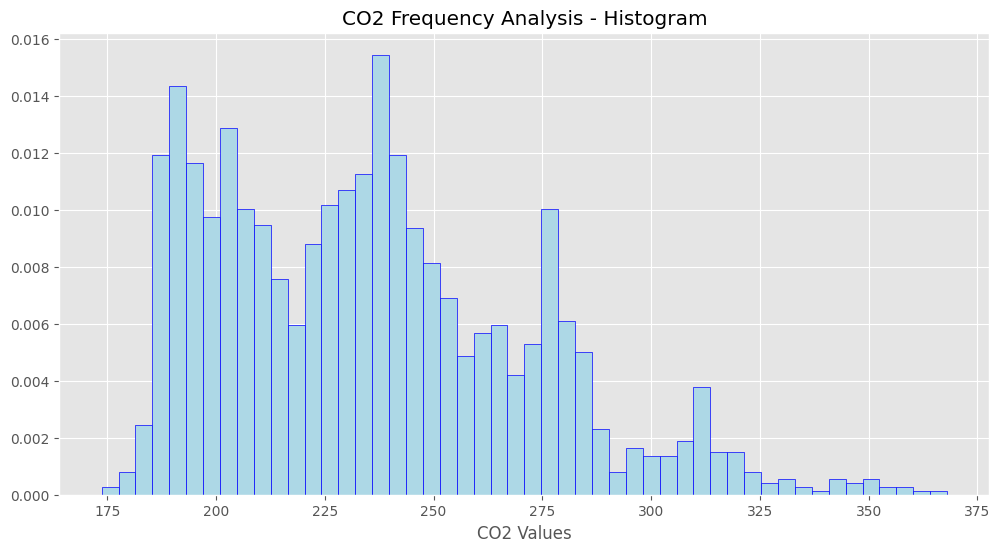

In [211]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(co2, bins=50, density=True, color="lightblue", ec="blue" )
plt.xlabel('CO2 Values')
plt.title('CO2 Frequency Analysis - Histogram')

Text(0.5, 1.0, 'CO2 Frequency Analysis - KDE Plot')

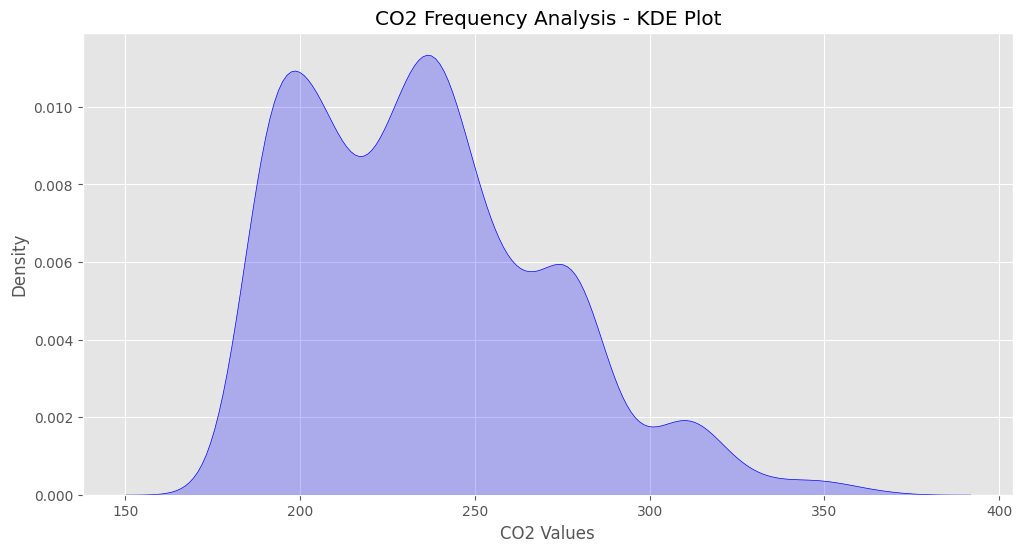

In [213]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(co2, fill=True, color="Blue")
plt.xlabel('CO2 Values')
plt.ylabel('Density')
plt.title('CO2 Frequency Analysis - KDE Plot')


In [67]:
tempdf=pd.read_csv('temperaturedata.csv')

In [68]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


In [69]:
tempdf['year_temp'] = tempdf['EDC3béta'].apply(lambda x: -x)

In [70]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,year_temp
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,50.00000
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,43.55977
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,37.44019
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,31.64156
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,24.55278
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-816871.60000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-817693.60000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-818505.50000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-819303.10000


[Text(0.5, 1.0, 'Temperature 800kyrs to Present')]

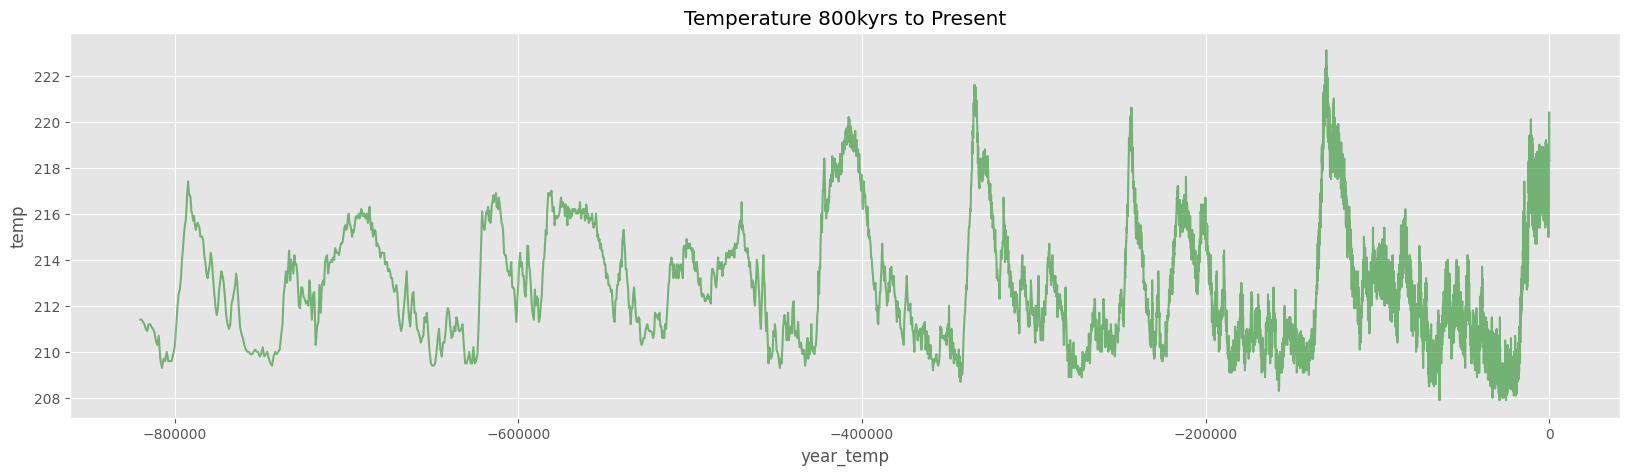

In [217]:
sns.lineplot(data=tempdf, x='year_temp', y='temp', color='green', alpha = 0.5).set(title='Temperature 800kyrs to Present')


In [72]:
year_co2 = co2df[['year_co2','CO2 (ppmv)']]
year_temp = tempdf[['year_temp','temp']]

In [147]:
temp = tempdf['temp'].to_numpy()
temp

array([218.3, 218.3, 218.3, ..., 211.3, 211.4, 211.4])

In [146]:
temp_mean = tempdf['temp'].mean()
temp_mean

213.4747207423956

Text(0.5, 1.0, 'Temperature Frequency Analysis - Histogram')

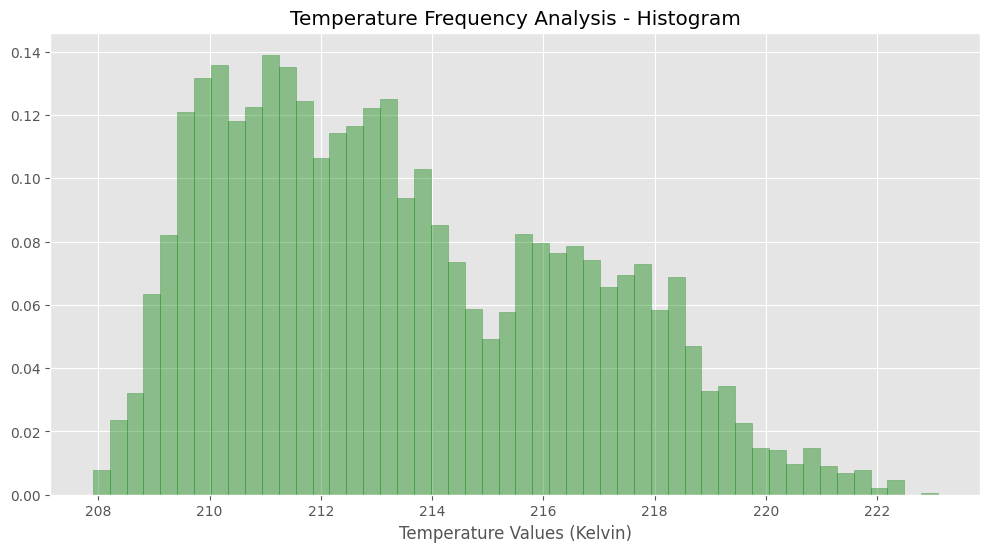

In [222]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(temp, bins=50, density=True, color="green", alpha = 0.4, ec="green" )
plt.xlabel('Temperature Values (Kelvin)')
plt.title('Temperature Frequency Analysis - Histogram')

Text(0.5, 1.0, 'Temperature Frequency Analysis - KDE')

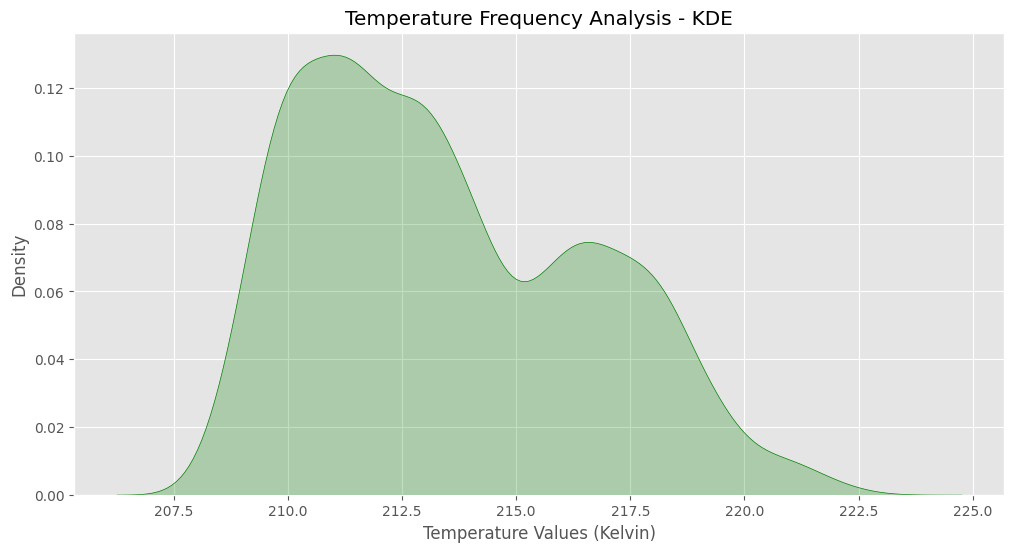

In [224]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(temp, fill=True, color="Green")
plt.xlabel('Temperature Values (Kelvin)')
plt.ylabel('Density')
plt.title('Temperature Frequency Analysis - KDE')

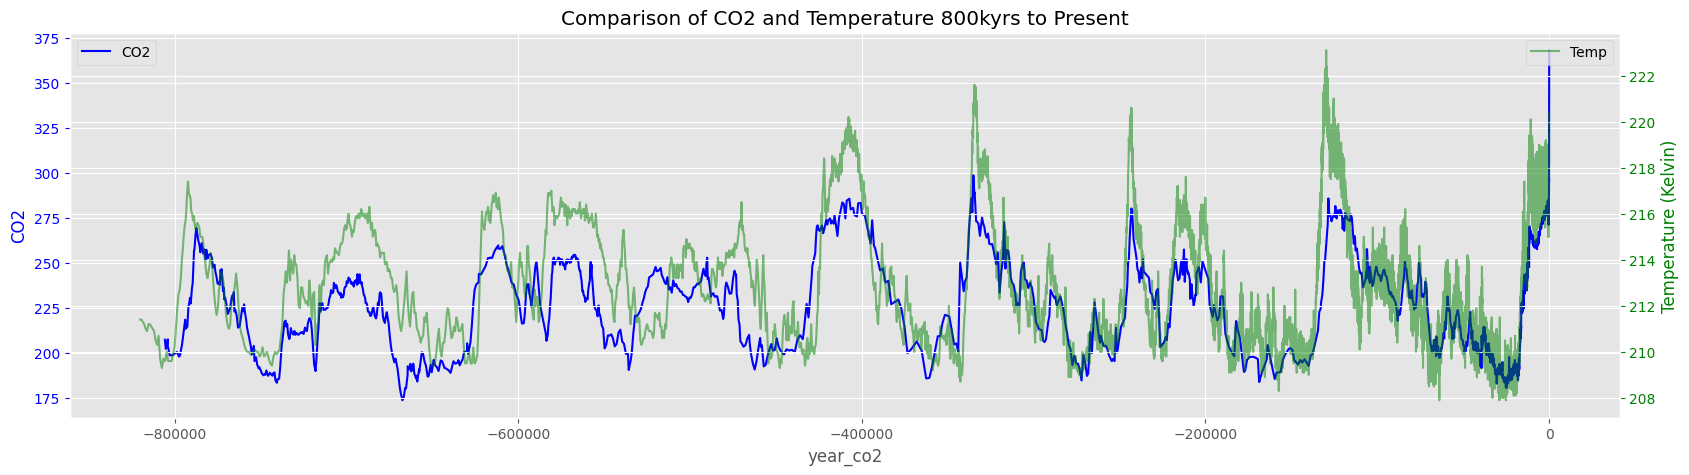

In [225]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2df['year_co2'], co2df['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(tempdf['year_temp'], tempdf['temp'], label='Temp', color='green',alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of CO2 and Temperature 800kyrs to Present')

# Display the plot
plt.show()

### Methane

Methane data from https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt converted from txt file to csv file.

In [77]:
# Read the content of the file
with open('Methane CH4 800kyrs to present.txt', 'r') as file:
    lines = file.readlines()

# Process each line and add commas
lines_with_commas = []
for line in lines:
    columns = line.strip().split()  
    line_with_commas = ','.join(columns) + '\n'
    lines_with_commas.append(line_with_commas)

# Write the modified content back to the file
with open('Methane CH4 800kyrs to present.csv', 'w') as file:
    file.writelines(lines_with_commas)

Creating Methane dataframe.

In [78]:
ch4df=pd.read_csv('Methane CH4 800kyrs to present.csv')
ch4df

,Depth,GasAge,CH4mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [79]:
ch4df['year_CH4'] = ch4df['GasAge'].apply(lambda x: -x)

[Text(0.5, 1.0, 'Methane Trend 800kyrs to Present')]

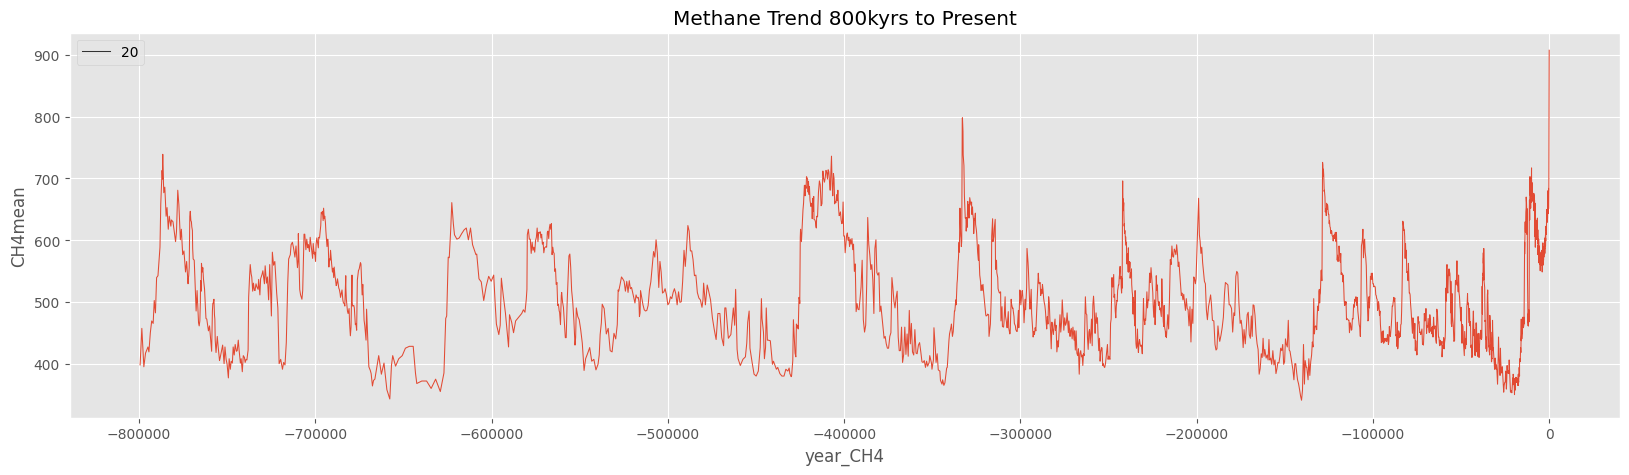

In [80]:
sns.lineplot(data=ch4df, x='year_CH4', y='CH4mean',size=20).set(title='Methane Trend 800kyrs to Present')

In [150]:
methane = ch4df['CH4mean'].to_numpy()
methane

array([907, 784, 762, ..., 396, 458, 399], dtype=int64)

Text(0.5, 1.0, 'Methane Frequency Analysis - Histogram')

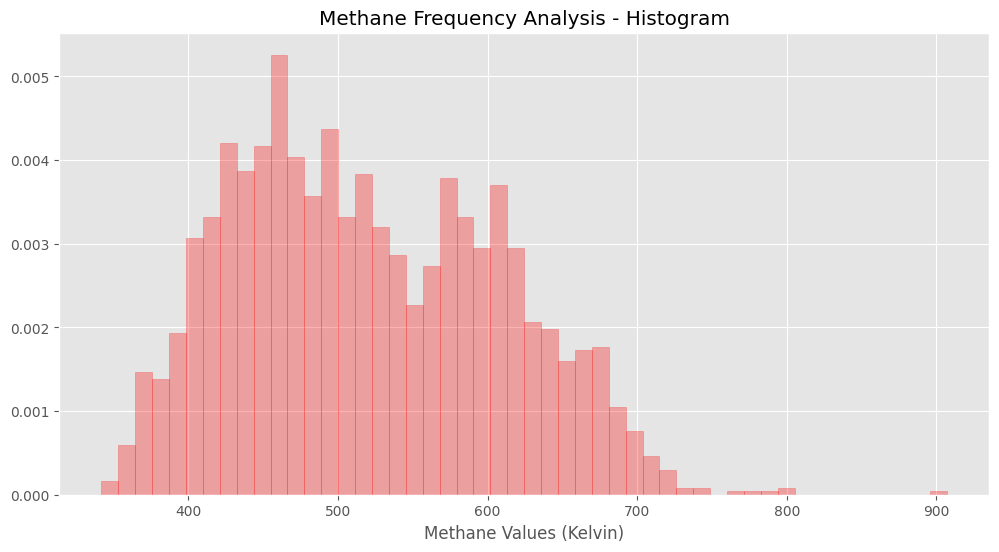

In [229]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(methane, bins=50, density=True, color="red", alpha = 0.3, ec="red" )
plt.xlabel('Methane Values (Kelvin)')
plt.title('Methane Frequency Analysis - Histogram')

<Axes: ylabel='Density'>

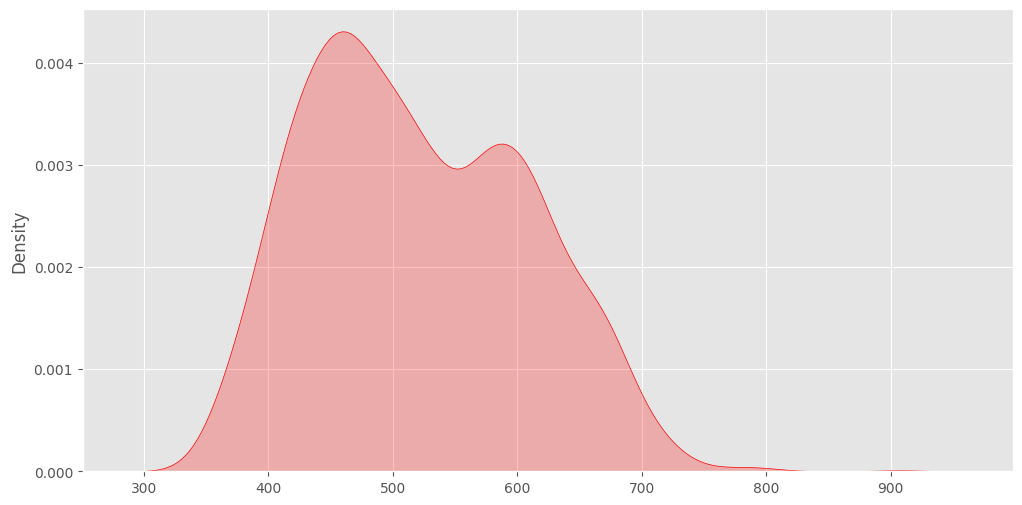

In [151]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(methane, fill=True, color="Red")

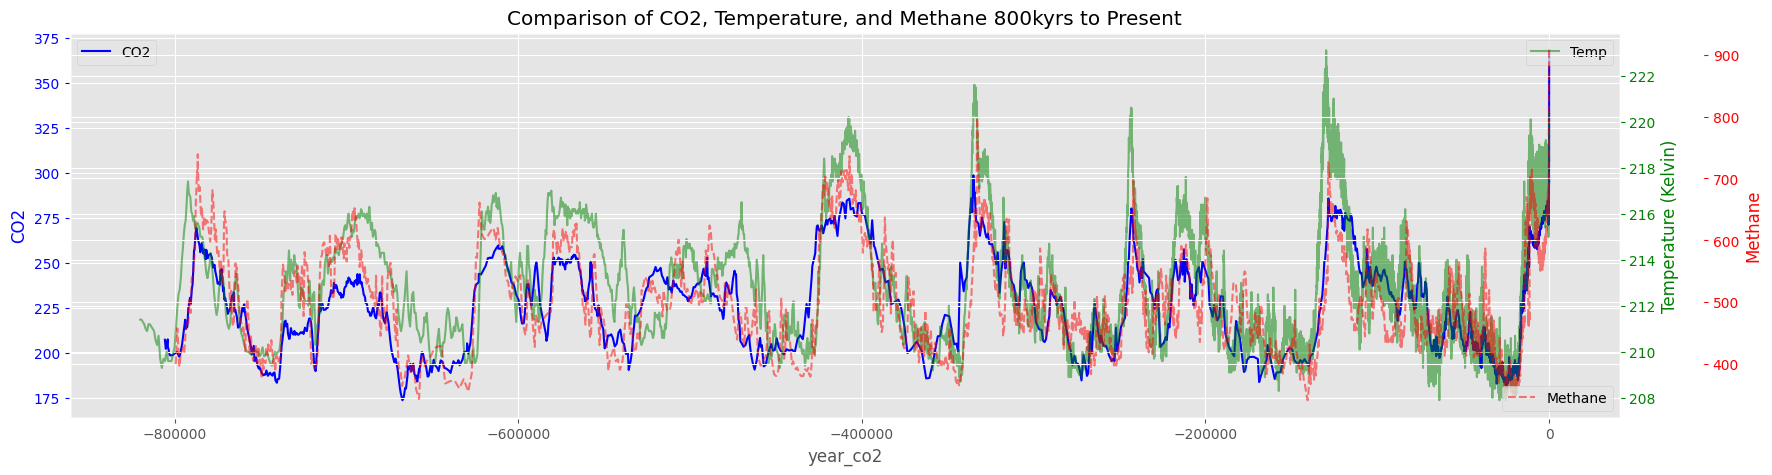

In [226]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2df['year_co2'], co2df['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(tempdf['year_temp'], tempdf['temp'], label='Temp', color='green', alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third set of data on the third y-axis
ax3.plot(ch4df['year_CH4'], ch4df['CH4mean'], label='Methane', color='red', linestyle='dashed', alpha=0.5)
ax3.set_ylabel('Methane', color='red')
ax3.tick_params('y', colors='red')

# Move the spine of the third y-axis to the right to avoid overlapping
ax3.spines['right'].set_position(('outward', 60))

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Add title
plt.title('Comparison of CO2, Temperature, and Methane 800kyrs to Present')

# Display the plot
plt.show()

The above graph depicts how CO2 (blue), temperature (green) and methane (red) has trended over the past 800,000 years. The trend shows a very strong correlation between the three variables and of the three temperature is the leading variable and CO2 and methane lagging slightly. Across the 800,000 years there are several cycles of peaks and troughs, with peaks getting progressively higher and are longer in duration, particularly in the past 400k years as it draws closer to present day.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


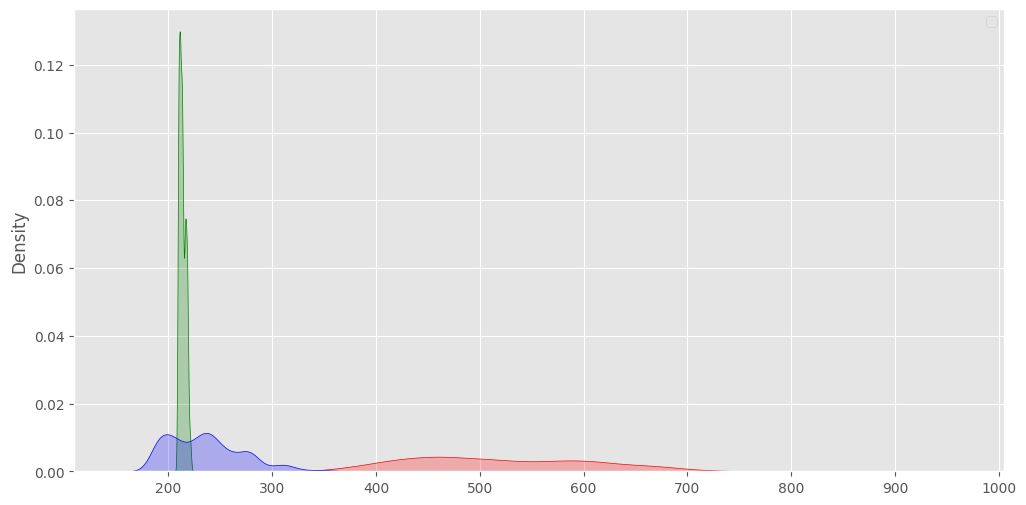

In [156]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(methane, fill=True, color="Red")
sns.kdeplot(temp, fill=True, color="Green")
sns.kdeplot(co2, fill=True, color="Blue")

plt.legend()

Although not comparing apples with apples it is interesting to observe the differences in the range of each of the three variables 

In [82]:
year_ch4 = ch4df[['GasAge','CH4mean']]

### Irish Data

Median monthly data from 1711 to 2016

In [83]:
ire_df = pd.read_csv("https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip")

In [84]:
ire_df['Date'] = pd.to_datetime(ire_df['Year'].astype(str) + ire_df['Month'].astype(str), format='%Y%m')

In [85]:
ire_df

,Year,Month,Median montly series,Date
0,1711,1,16.4,1711-01-01
1,1711,2,73.1,1711-02-01
2,1711,3,121.2,1711-03-01
3,1711,4,85.2,1711-04-01
4,1711,5,66.6,1711-05-01
...,...,...,...,...
3667,2016,8,79.1,2016-08-01
3668,2016,9,108.1,2016-09-01
3669,2016,10,51.8,2016-10-01
3670,2016,11,58.0,2016-11-01


<Axes: xlabel='Date', ylabel='Median montly series'>

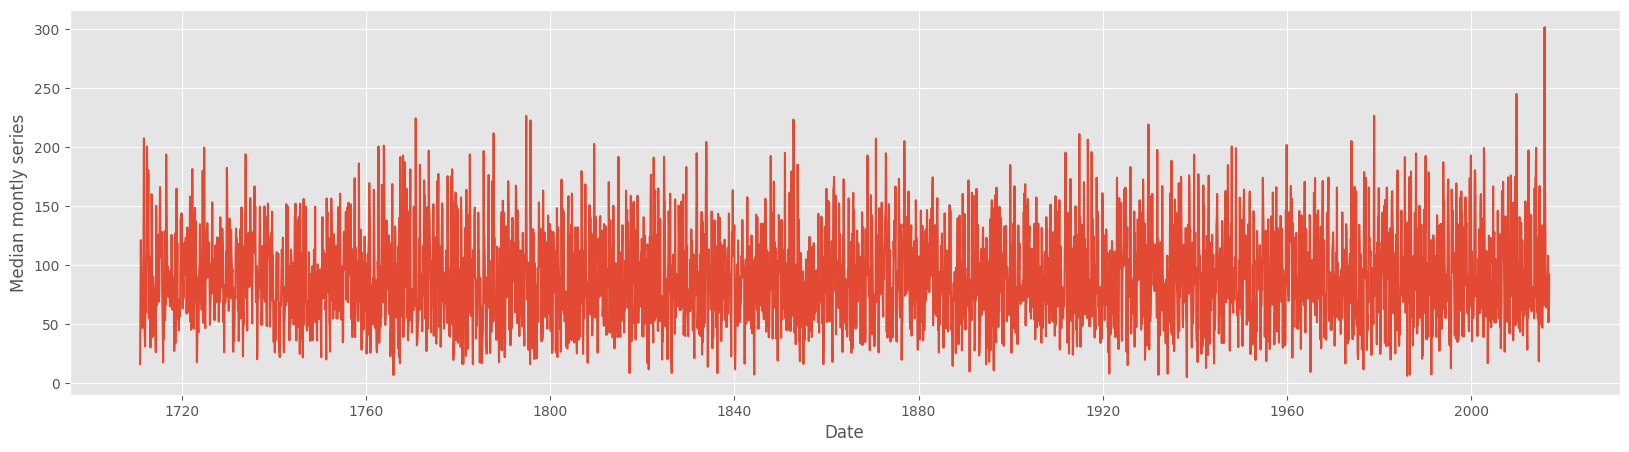

In [86]:
sns.lineplot(data=ire_df, x='Date', y='Median montly series' )

<Axes: ylabel='Median montly series'>

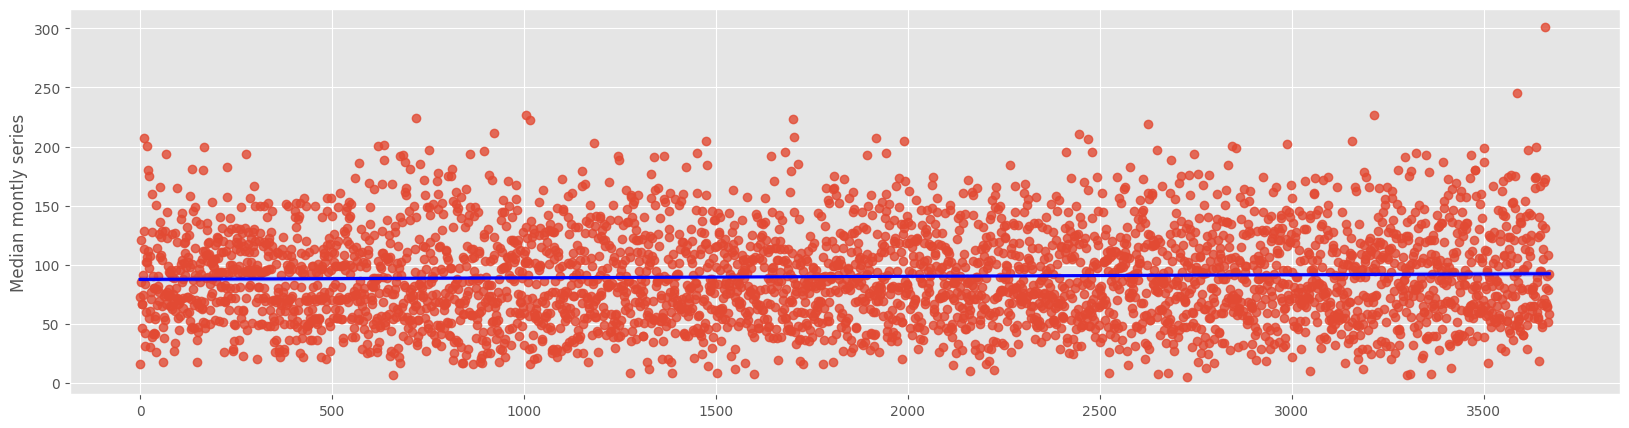

In [118]:
sns.regplot(x=ire_df.index, y="Median montly series", data=ire_df,  line_kws={"color": "blue"})

In [88]:
mayo_rain_df=pd.read_csv('Mayo_Rainfall.csv', skiprows=19, usecols=[0,1,7,])

In [89]:
mayo_rain_df

,year,month,rain
0,1956,9,49.9
1,1956,10,98.8
2,1956,11,51.6
3,1956,12,180.6
4,1957,1,148.5
...,...,...,...
797,2023,7,148.5
798,2023,8,117.2
799,2023,9,77.2
800,2023,10,100.0


In [90]:
mayo_rain_df['mayo_date'] = pd.to_datetime(mayo_rain_df['year'].astype(str) + mayo_rain_df['month'].astype(str), format='%Y%m')

In [91]:
mayo_rain_df['mayo_rain'] = mayo_rain_df['rain']

In [92]:
mayo_rain_df

,year,month,rain,mayo_date,mayo_rain
0,1956,9,49.9,1956-09-01,49.9
1,1956,10,98.8,1956-10-01,98.8
2,1956,11,51.6,1956-11-01,51.6
3,1956,12,180.6,1956-12-01,180.6
4,1957,1,148.5,1957-01-01,148.5
...,...,...,...,...,...
797,2023,7,148.5,2023-07-01,148.5
798,2023,8,117.2,2023-08-01,117.2
799,2023,9,77.2,2023-09-01,77.2
800,2023,10,100.0,2023-10-01,100.0


In [93]:
mayo = mayo_rain_df[['mayo_date','mayo_rain']].copy()

<Axes: xlabel='mayo_date', ylabel='mayo_rain'>

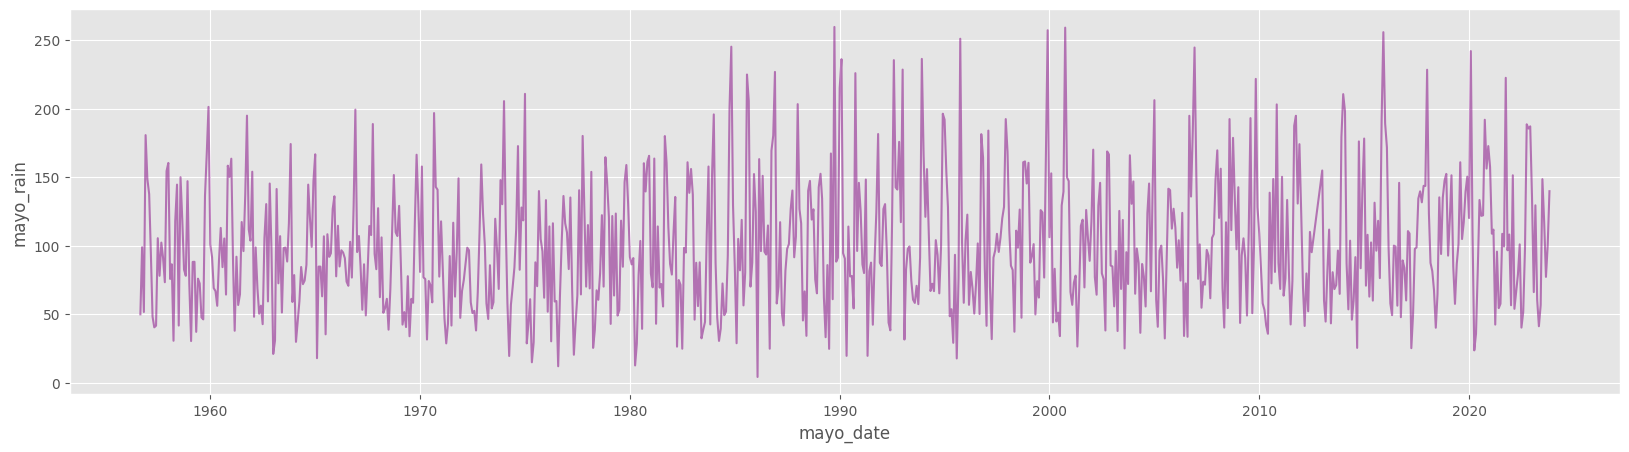

In [243]:
sns.lineplot(data=mayo, x='mayo_date', y='mayo_rain', color = 'purple', alpha = 0.5 )

<Axes: ylabel='mayo_rain'>

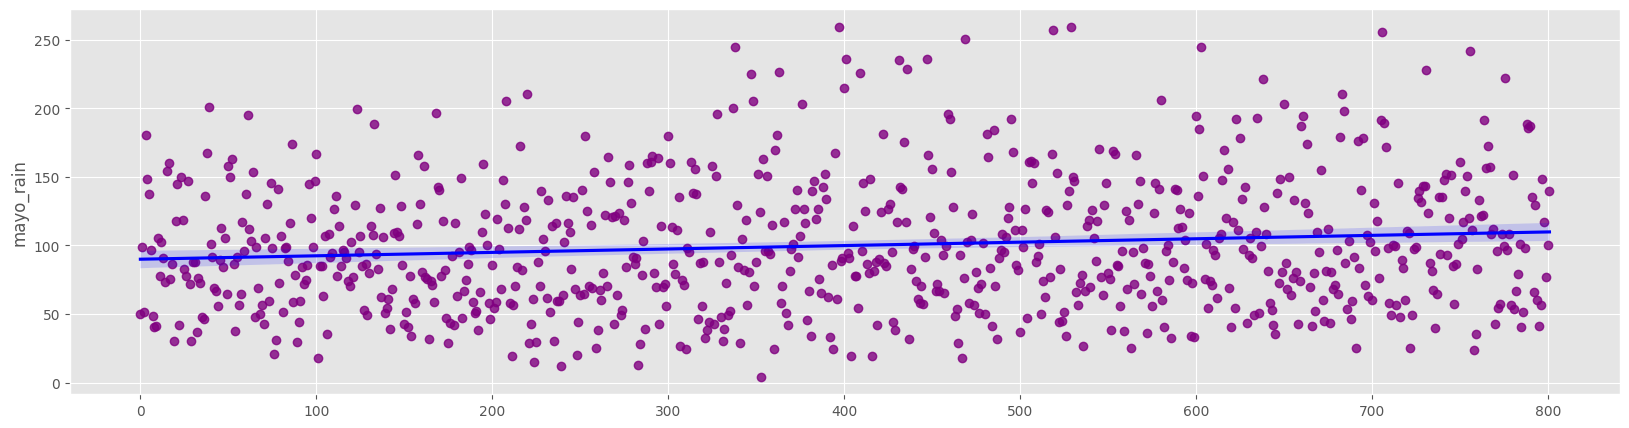

In [245]:
sns.regplot(x=mayo.index, y="mayo_rain", data=mayo, color ='purple', line_kws={"color": "blue"})

In [96]:
wexford_rain_df=pd.read_csv('Wexford_Rainfall.csv', skiprows=13, usecols=[0,1,3])
wexford_rain_df['wex_date'] = pd.to_datetime(wexford_rain_df['year'].astype(str) + wexford_rain_df['month'].astype(str), format='%Y%m')
wexford_rain_df['wexford_rain'] = wexford_rain_df['rain']


In [97]:
wexford_rain_df 

,year,month,rain,wex_date,wexford_rain
0,1987,9,100.5,1987-09-01,100.5
1,1987,10,176.7,1987-10-01,176.7
2,1987,11,67.7,1987-11-01,67.7
3,1987,12,91.5,1987-12-01,91.5
4,1988,1,205.4,1988-01-01,205.4
...,...,...,...,...,...
425,2023,4,62.5,2023-04-01,62.5
426,2023,5,34.7,2023-05-01,34.7
427,2023,6,71.3,2023-06-01,71.3
428,2023,7,117.5,2023-07-01,117.5


In [237]:
wexford = wexford_rain_df[['wex_date','wexford_rain']].copy()

<Axes: xlabel='wex_date', ylabel='wexford_rain'>

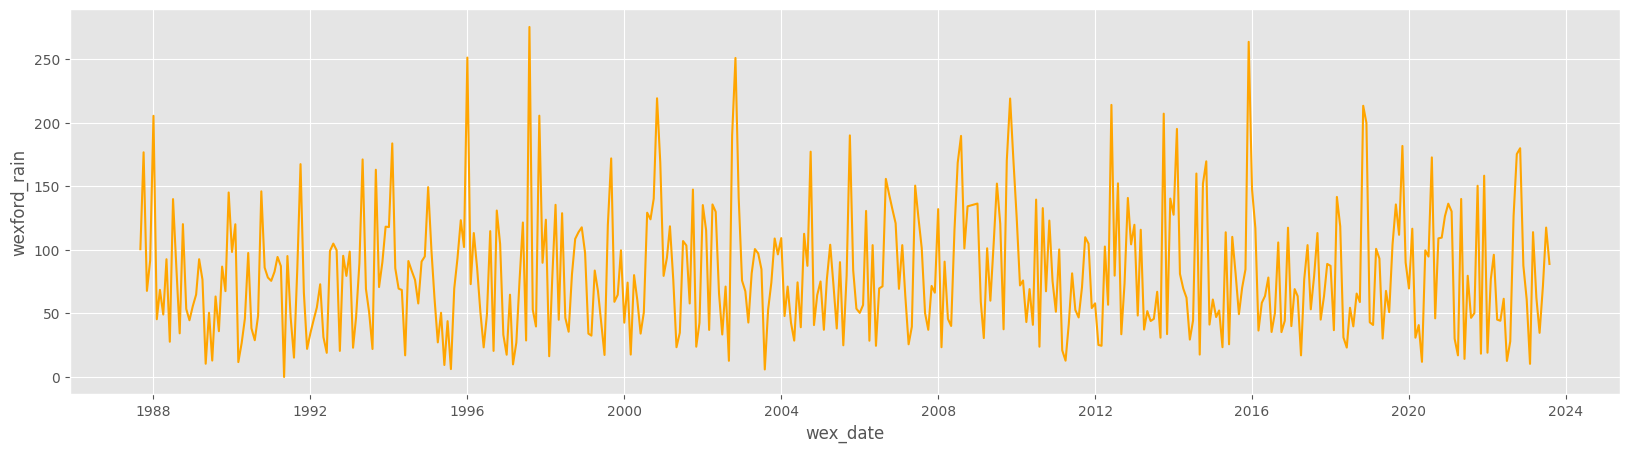

In [239]:
sns.lineplot(data=wexford, x="wex_date", y="wexford_rain", color = 'orange')

<Axes: ylabel='rain'>

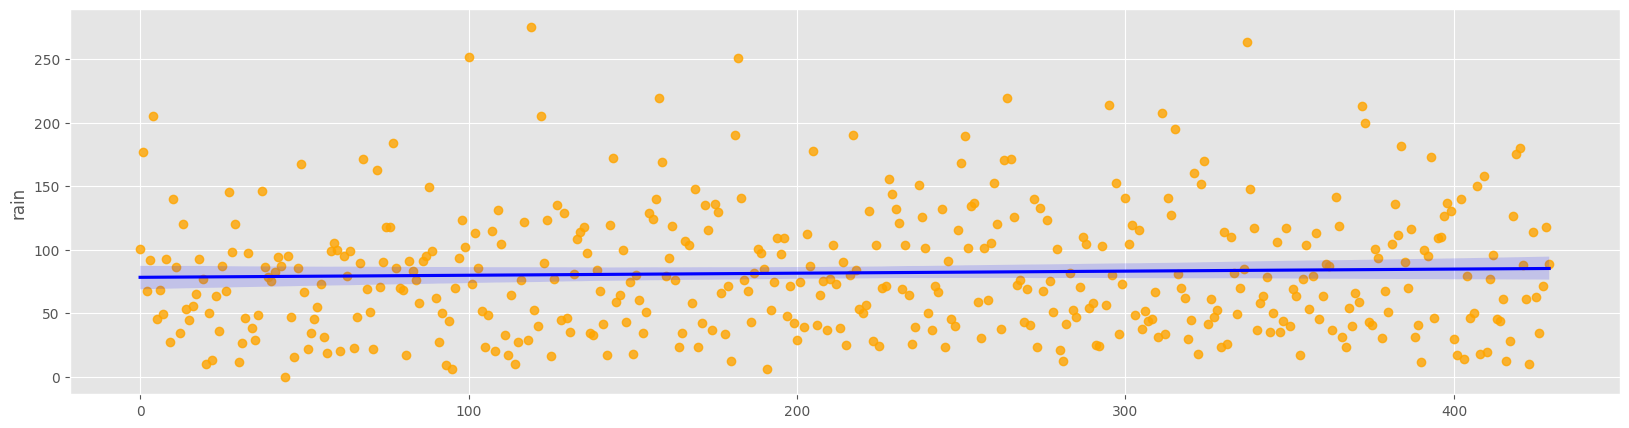

In [240]:
sns.regplot(x=wexford.index, y="rain", data=wexford_rain_df, color= 'orange', line_kws={"color": "blue"})

### Combining Data Sets

In [101]:
ireland_rain_df = pd.concat([mayo, wexford], axis =1)

In [102]:
ireland_rain_df

,mayo_date,mayo_rain,wex_date,wexford_rain
0,1956-09-01,49.9,1987-09-01,100.5
1,1956-10-01,98.8,1987-10-01,176.7
2,1956-11-01,51.6,1987-11-01,67.7
3,1956-12-01,180.6,1987-12-01,91.5
4,1957-01-01,148.5,1988-01-01,205.4
...,...,...,...,...
797,2023-07-01,148.5,NaT,NaN
798,2023-08-01,117.2,NaT,NaN
799,2023-09-01,77.2,NaT,NaN
800,2023-10-01,100.0,NaT,NaN


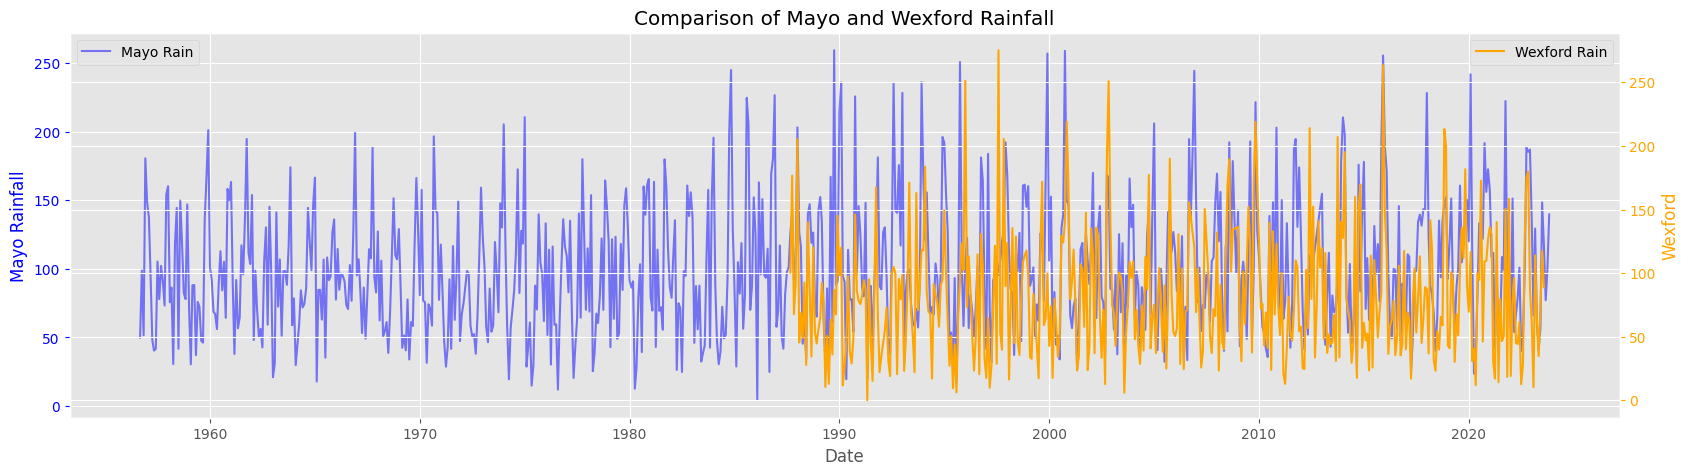

In [230]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(ireland_rain_df['mayo_date'], ireland_rain_df['mayo_rain'], label='Mayo Rain', color='blue', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mayo Rainfall', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(ireland_rain_df['wex_date'], ireland_rain_df['wexford_rain'], label='Wexford Rain', color='orange')
ax2.set_ylabel('Wexford', color='orange')
ax2.tick_params('y', colors='orange')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall')

# Display the plot
plt.show()

In [104]:
reduced_mayo = mayo.iloc[372: ].reset_index(0)

In [105]:
reduced_mayo

,index,mayo_date,mayo_rain
0,372,1987-09-01,126.7
1,373,1987-10-01,140.2
2,374,1987-11-01,91.5
3,375,1987-12-01,106.6
4,376,1988-01-01,203.2
...,...,...,...
425,797,2023-07-01,148.5
426,798,2023-08-01,117.2
427,799,2023-09-01,77.2
428,800,2023-10-01,100.0


In [106]:
mayo_wex = pd.concat([reduced_mayo, wexford], axis =1)

In [107]:
mayo_wex

,index,mayo_date,mayo_rain,wex_date,wexford_rain
0,372,1987-09-01,126.7,1987-09-01,100.5
1,373,1987-10-01,140.2,1987-10-01,176.7
2,374,1987-11-01,91.5,1987-11-01,67.7
3,375,1987-12-01,106.6,1987-12-01,91.5
4,376,1988-01-01,203.2,1988-01-01,205.4
...,...,...,...,...,...
425,797,2023-07-01,148.5,2023-04-01,62.5
426,798,2023-08-01,117.2,2023-05-01,34.7
427,799,2023-09-01,77.2,2023-06-01,71.3
428,800,2023-10-01,100.0,2023-07-01,117.5


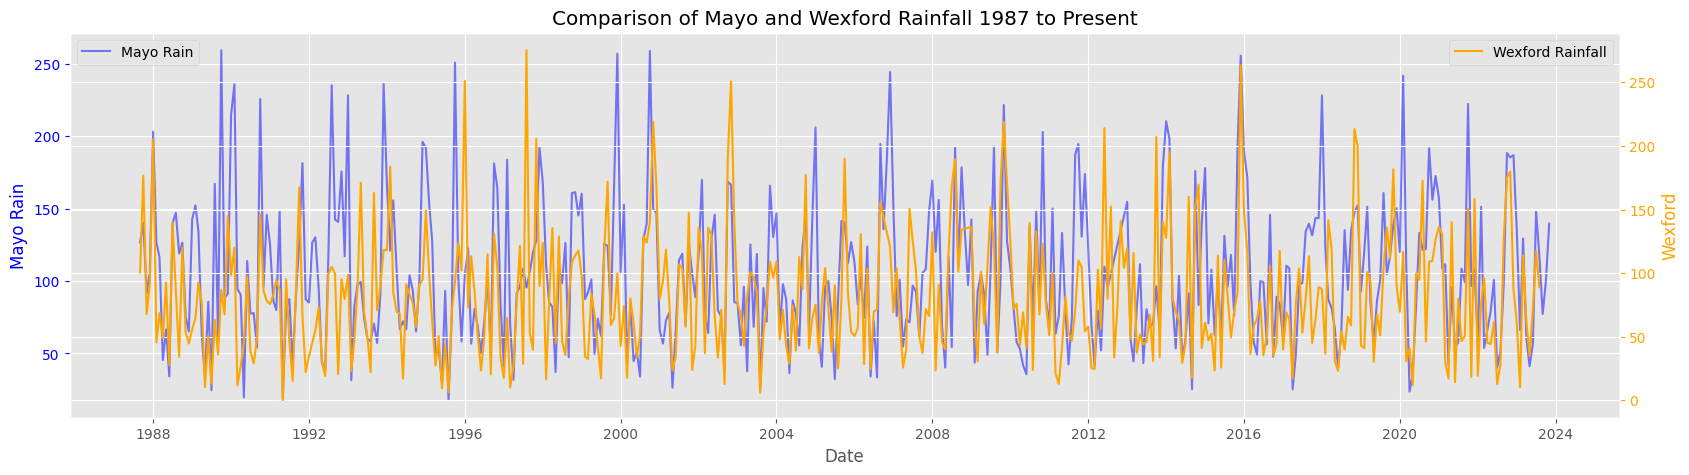

In [108]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(mayo_wex['mayo_date'], mayo_wex['mayo_rain'], label='Mayo Rain', color='blue', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mayo Rain', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(mayo_wex['wex_date'], mayo_wex['wexford_rain'], label='Wexford Rainfall', color='orange')
ax2.set_ylabel('Wexford', color='orange')
ax2.tick_params('y', colors='orange')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of Mayo and Wexford Rainfall 1987 to Present')

# Display the plot
plt.show()

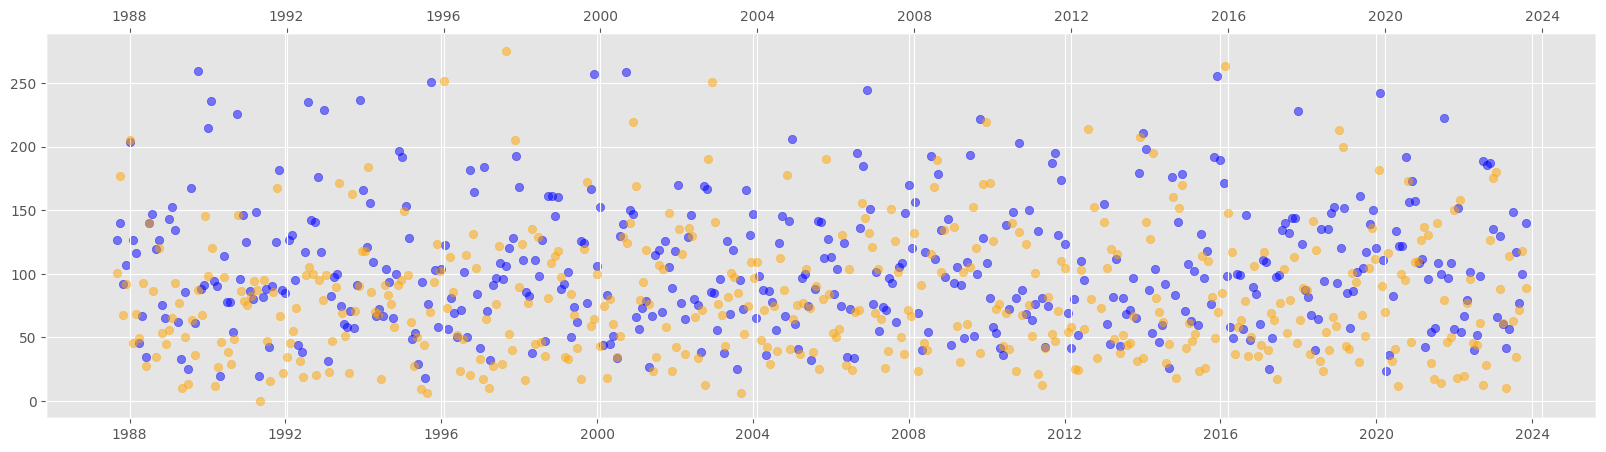

In [232]:
fig, ax = plt.subplots()
ay = ax.twiny()

ax.scatter( mayo_wex['mayo_date'], mayo_wex['mayo_rain'], color='blue', alpha = 0.5)
ay.scatter(mayo_wex['wex_date'], mayo_wex['wexford_rain'],  color='orange', alpha = 0.5)
plt.show()

<Axes: ylabel='rain'>

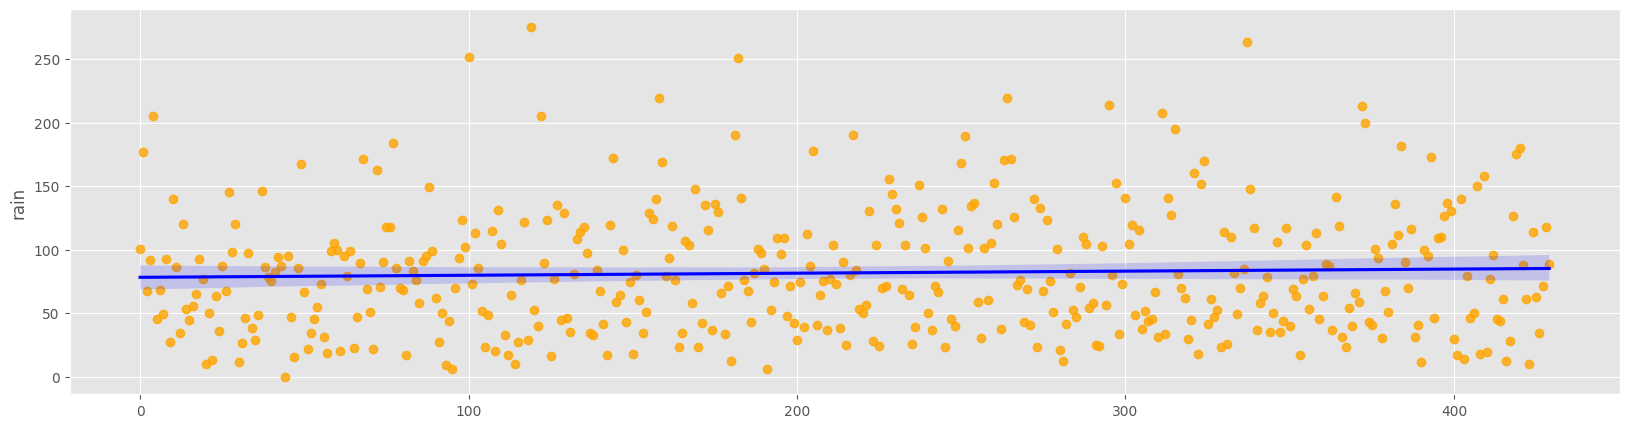

In [233]:
sns.regplot(x=wexford.index, y="rain", data=wexford_rain_df, color='orange', line_kws={"color": "blue"})

(array([0.00076027, 0.00532189, 0.00608216, 0.0076027 , 0.01013693,
        0.00912324, 0.00582874, 0.00988351, 0.0076027 , 0.00684243,
        0.00658901, 0.00608216, 0.00532189, 0.00405477, 0.00405477,
        0.00278766, 0.00228081, 0.00076027, 0.00228081, 0.00126712,
        0.00101369, 0.00050685, 0.00076027, 0.00101369, 0.        ,
        0.        , 0.        , 0.00050685, 0.00025342, 0.00025342]),
 array([  0.        ,   9.17666667,  18.35333333,  27.53      ,
         36.70666667,  45.88333333,  55.06      ,  64.23666667,
         73.41333333,  82.59      ,  91.76666667, 100.94333333,
        110.12      , 119.29666667, 128.47333333, 137.65      ,
        146.82666667, 156.00333333, 165.18      , 174.35666667,
        183.53333333, 192.71      , 201.88666667, 211.06333333,
        220.24      , 229.41666667, 238.59333333, 247.77      ,
        256.94666667, 266.12333333, 275.3       ]),
 <BarContainer object of 30 artists>)

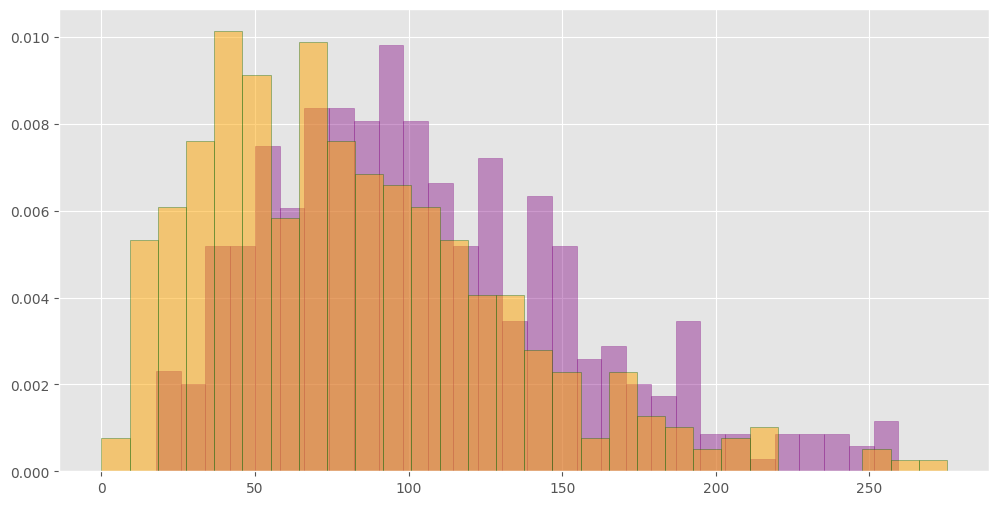

In [250]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(mayo_wex['mayo_rain'], bins=30, density=True, color="purple", ec="purple" , alpha = 0.4)
ax.hist(mayo_wex['wexford_rain'], bins=30, density=True, color="orange", ec="darkgreen" , alpha = 0.5)

<Axes: xlabel='mayo_rain', ylabel='Density'>

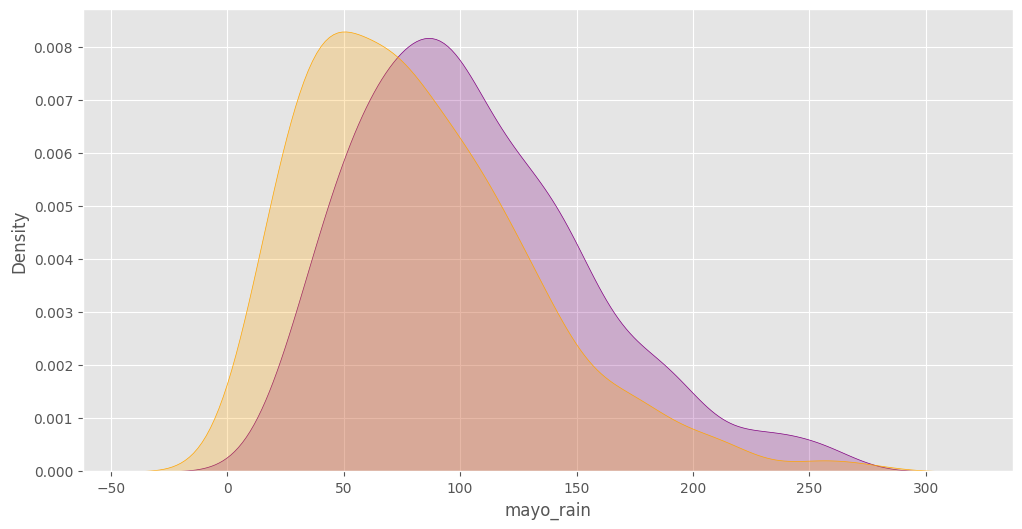

In [251]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(mayo_wex['mayo_rain'], fill=True, color="Purple")
sns.kdeplot(mayo_wex['wexford_rain'], fill=True, color="Orange")


In [172]:
mayo_mean = mayo_wex['mayo_rain'].mean()
mayo_mean

105.54465116279071

In [173]:
wex_mean = mayo_wex['wexford_rain'].mean()
wex_mean

81.70930232558139

In [111]:
combined = pd.concat([co2andtemp, year_ch4, ireland_rain_df], axis =1)

In [112]:
combined

,year_co2,CO2 (ppmv),year_temp,temp,GasAge,CH4mean,mayo_date,mayo_rain,wex_date,wexford_rain
0,51.0,368.02,50.00000,218.3,13.0,907.0,1956-09-01,49.9,1987-09-01,100.5
1,48.0,361.78,43.55977,218.3,126.0,784.0,1956-10-01,98.8,1987-10-01,176.7
2,46.0,359.65,37.44019,218.3,130.0,762.0,1956-11-01,51.6,1987-11-01,67.7
3,44.0,357.11,31.64156,218.3,151.0,710.0,1956-12-01,180.6,1987-12-01,91.5
4,43.0,353.95,24.55278,218.3,184.0,727.0,1957-01-01,148.5,1988-01-01,205.4
...,...,...,...,...,...,...,...,...,...,...
5814,NaN,NaN,-816871.60000,211.0,NaN,NaN,NaT,NaN,NaT,NaN
5815,NaN,NaN,-817693.60000,211.2,NaN,NaN,NaT,NaN,NaT,NaN
5816,NaN,NaN,-818505.50000,211.3,NaN,NaN,NaT,NaN,NaT,NaN
5817,NaN,NaN,-819303.10000,211.4,NaN,NaN,NaT,NaN,NaT,NaN


In [113]:
combined.to_csv('combined_data.csv', index=False) 

In [114]:
combined.to_json('combined_data.json', orient='records') 

### Predictions

In [115]:
X = combined[['CO2 (ppmv)', 'CH4mean']]
y = combined['temp']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

# Choose the number of neighbors (k) and create the model
k = 3  # You can adjust this value
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_model.fit(X_train, y_train)

new_data = pd.DataFrame({ 
    'CO2 (ppmv)': [],  # Replace with your actual feature values
    'CH4mean': []})

# Assuming 'new_data' is your new dataset for future predictions
new_predictions = knn_model.predict(new_data)

import matplotlib.pyplot as plt

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the predicted data points
plt.scatter(X_test, knn_model.predict(X_test), color='red', label='Predicted Data')

# Plot the line of predictions for future data
plt.plot(new_data, new_predictions, color='green', linewidth=2, label='Future Predictions')

# Add labels and legend
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()

# Show the plot
plt.show()



ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import statsmodels.api as sm


# Perform the regression analysis
X = combined[['CO2 (ppmv)', 'temp']]
y = combined['CH4mean']

# Handle missing values by dropping rows with missing values
data = pd.concat([X, y], axis=1).dropna()

X = data[['CO2 (ppmv)', 'temp']]
y = data['CH4mean']

X = sm.add_constant(X)  # Add a constant term to the independent variables

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                CH4mean   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.56e-42
Time:                        22:34:12   Log-Likelihood:                -11122.
No. Observations:                1901   AIC:                         2.225e+04
Df Residuals:                    1898   BIC:                         2.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        285.9952    124.351      2.300      0.0

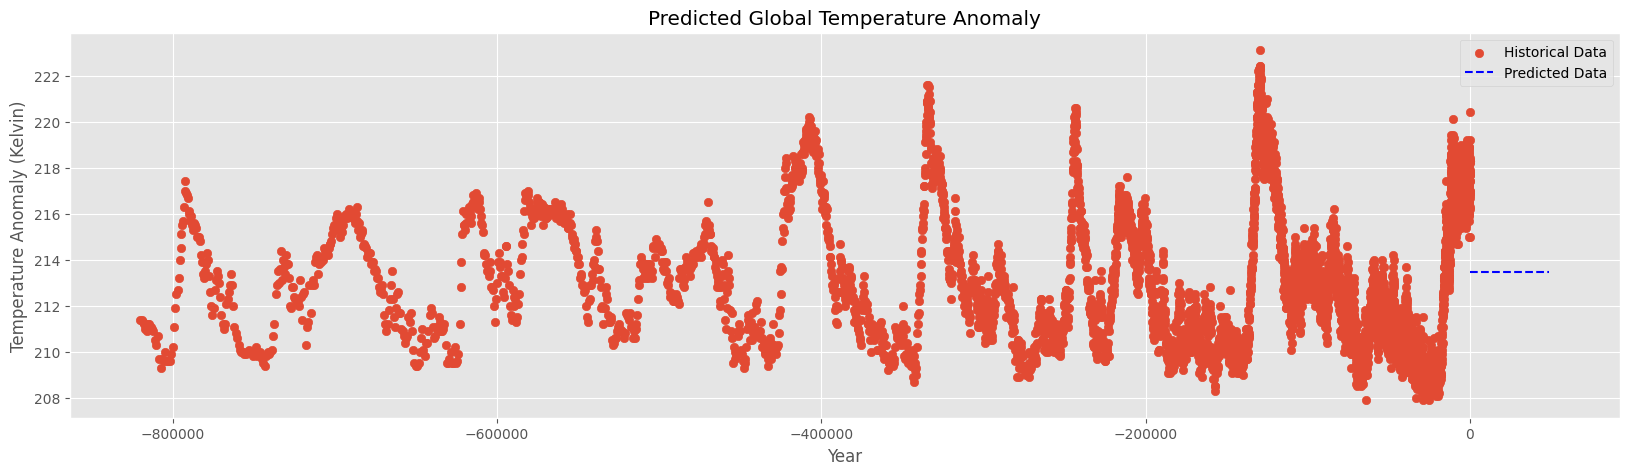

In [260]:
from sklearn.linear_model import LinearRegression

# Historical data (example data, not real data)
years = combined['year_temp'].to_numpy()
co2_levels = combined['CO2 (ppmv)'].to_numpy()


# Reshape for sklearn
years_reshaped = years.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression().fit(years_reshaped, temp)

# Extrapolate future years
future_years = np.arange(0, 50000, 1000).reshape(-1, 1)
predicted_temperature_anomalies = model.predict(future_years)

# Plot the historical data and predictions
plt.scatter(years, temp, label='Historical Data')
plt.plot(future_years, predicted_temperature_anomalies, label='Predicted Data', linestyle='dashed', color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (Kelvin)')
plt.title('Predicted Global Temperature Anomaly')
plt.legend()
plt.show()

In [ ]:
new_co2_value = 380
new_temperature_value = 220

# Now you can use the model for prediction if needed
# For example, if you have new data for CO2 and Temperature, you can predict Methane values
new_data = pd.DataFrame({'CO2': [new_co2_value], 'Temperature': [new_temperature_value]})
new_data = sm.add_constant(new_data)

predicted_methane = model.predict(new_data)
print(predicted_methane)

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [ ]:
co2 = combined['CO2 (ppmv)'].to_numpy()
temp = combined['temp'].to_numpy()

In [ ]:
co2 = co2.reshape(-1,1)
temp = temp.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(co2)

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

### References

[1] pandas.pydata.org. (n.d.). pandas.DataFrame.apply — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html. [Accessed 20 Dec. 2023].

[2] Marsja, E. (2023). Combine Year and Month Columns in Pandas. [online] Erik Marsja. Available at: https://www.marsja.se/combine-year-and-month-columns-in-pandas/ [Accessed 20 Dec. 2023].‌

[3] Stack Overflow. (n.d.). python - How to change the figure size of a seaborn axes or figure level plot. [online] Available at: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot. [Accessed 20 Dec. 2023].

[4] matplotlib.org. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html. [Accessed 20 Dec. 2023]

[6] Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer, J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter, F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, J.L. Tison, M. Werner, and E.W. Wolff.  2007. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years. Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

[7] Loulergue, L., A. Schilt, R. Spahni, V. Masson-Delmotte, T. Blunier, B. Lemieux, J.-M. Barnola, D. Raynaud, T.F. Stocker, and J. Chappellaz. 2008. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, Vol. 453, pp. 383-386, 15 May 2008. doi:10.1038/nature06950. Noaa.gov. (2013). Available at: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt [Accessed 20 Dec. 2023]. ‌

[8] Stack Overflow. (n.d.). python - How to make inline plots in Jupyter Notebook larger? [online] Available at: https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger. [Accessed 21 Dec. 2023]. 

‌

pandas.pydata.org. (n.d.). pandas.DataFrame.astype — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html. [Accessed 21 Dec. 2023]. 

‌

Fusio.net. (2023). Available at: https://cli.fusio.net/cli/climate_data/webdata/mly2375.zip [Accessed 21 Dec. 2023].

‌

Nik (2023). Converting Pandas DataFrame Column from Object to Float • datagy. [online] datagy. Available at: https://datagy.io/pandas-convert-object-to-float/ [Accessed 22 Dec. 2023].

‌

Stack Overflow. (n.d.). python - Different colors for points and line in Seaborn regplot. [online] Available at: https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot.

‌

Stack Overflow. (n.d.). scatter plot with multiple X features and single Y in Python. [online] Available at: https://stackoverflow.com/questions/59140950/scatter-plot-with-multiple-x-features-and-single-y-in-python [Accessed 22 Dec. 2023].

‌